# 3D Map

While representing the configuration space in 3 dimensions isn't entirely practical it's fun (and useful) to visualize things in 3D.

In this exercise you'll finish the implementation of `create_grid` such that a 3D grid is returned where cells containing a voxel are set to `True`. We'll then plot the result!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = 16, 16

In [3]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [4]:
def create_voxmap(data, voxel_size):
    """
    Returns a grid representation of a 3D configuration space
    based on given obstacle data.
    
    The `voxel_size` argument sets the resolution of the voxel map. 
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min))) // voxel_size
    east_size = int(np.ceil((east_max - east_min))) // voxel_size
    alt_size = int(alt_max) // voxel_size

    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)

    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i,:]
        # TODO: fill in the voxels that are part of an obstacle with `True`
        obstacles= [
            int(north - d_north - north_min) // voxel_size,
            int(north + d_north - north_min) // voxel_size,
            int(east - d_east - east_min) // voxel_size, 
            int(east + d_east - east_min) // voxel_size,
                   ]
        height = int(alt + d_alt) // voxel_size
        voxmap[obstacles[0]:obstacles[1], obstacles[2]:obstacles[3], 0:height] = True
        # i.e. grid[0:5, 20:26, 2:7] = True

    return voxmap

Create 3D grid.

In [5]:
voxmap = create_voxmap(data, 10)
print(voxmap.shape)

(92, 92, 21)


Plot the 3D grid. 

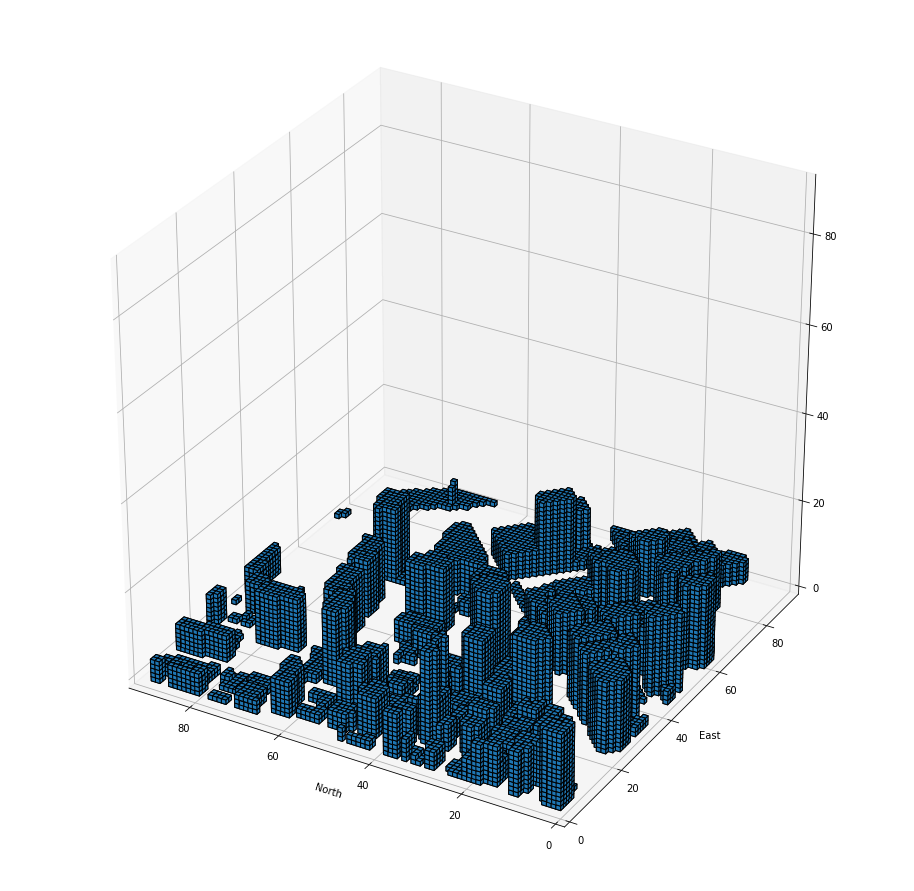

In [6]:
import time
t1 = time.time()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
# add 100 to the height so the buildings aren't so tall
ax.set_zlim(0, voxmap.shape[2]+70)

plt.xlabel('North')
plt.ylabel('East')

plt.show()
final_t = time.time()-t1

Isn't the city pretty?

[solution](/notebooks/Voxel-Map-Solution.ipynb)

In [7]:
print('Initial time:', t1)
print('Duration:', final_t)

Initial time: 1523368431.727052
Duration: 19.07604146003723
